In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json
! chmod 600 ~/.kaggle/kaggle.json

! kaggle datasets download parulpandey/palmer-archipelago-antarctica-penguin-data
! unzip palmer-archipelago-antarctica-penguin-data.zip

cp: cannot stat '/content/drive/MyDrive/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data
License(s): CC0-1.0
  0% 0.00/11.3k [00:00<?, ?B/s]
100% 11.3k/11.3k [00:00<00:00, 28.9MB/s]
Archive:  palmer-archipelago-antarctica-penguin-data.zip
  inflating: penguins_lter.csv       
  inflating: penguins_size.csv       


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Load a Kaggle dataset with data about **penguin species**, eliminating by default the instances that contain missing values (for this, we use the *dropna()* function from *pandas* library).

In [ ]:
import pandas as pd
penguins = pd.read_csv('penguins_size.csv').dropna()
penguins

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [ ]:
# @title Target is to classifiy the species (3 classes) of penguins from feature artibutes
penguins['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [ ]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


Data preparation, training and predictions. We will use **k=3**, so that each prediction will be based in the three closest training (labeled) instances to each test instance.

In [ ]:
# Separate predictor variables from class label
# For predictor attributes, we only keep numerical and exclude categorical ones
X = penguins.select_dtypes(exclude=['object'])
y = penguins.species

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=4)

In [ ]:
# @title k-Nearest Neighbors from scratch
import math
import numpy as np

# Euclidean distance
def euclidean(x, y):
  return np.sqrt(np.sum((x-y)**2))

# Locate the most similar neighbors
def get_neighbors(test_row, X_train, y_train, n_neighbors):
	distances = list()
	for (train_row, train_class) in zip(X_train, y_train):
		dist = euclidean(train_row, test_row)
		distances.append((dist, train_class))

	distances.sort(key=lambda tple: tple[0])
	neighbors = list()
	for i in range(n_neighbors):
		neighbors.append(distances[i][1])

	return neighbors

# Get the modal (most common) value in the passed array
def mode(arr):
  vals, cnts = np.unique(arr, return_counts=True)
  mode = vals[cnts.argmax()]

  return mode

# Make predictions
def predict(X_test, X_train, y_train, n_neighbors):
  preds = list()
  for test_row in X_test:
    neighbors = get_neighbors(test_row, X_train, y_train, n_neighbors)
    modal = mode(neighbors)
    preds.append(modal)

  return np.array(preds)

# Get accuracy
def accuracy(y_test, preds):
  return (preds == y_test).mean()

In [ ]:
knn_predict_scratch = predict(X_test.values, X_train.values, y_train.values, n_neighbors=1)
accuracy(knn_predict_scratch, y_test)

0.7920792079207921

In [ ]:
knn_predict_scratch = predict(X_test.values, X_train.values, y_train.values, n_neighbors=2)
accuracy(knn_predict_scratch, y_test)

0.7524752475247525

In [ ]:
knn_predict_scratch = predict(X_test.values, X_train.values, y_train.values, n_neighbors=3)
accuracy(knn_predict_scratch, y_test)

0.7722772277227723

In [ ]:
knn_predict_scratch = predict(X_test.values, X_train.values, y_train.values, n_neighbors=4)
accuracy(knn_predict_scratch, y_test)

0.7722772277227723

In [ ]:
# @title From Scikit-Learn API
from sklearn.neighbors import KNeighborsClassifier

**DO IT YOURSELF**: Try other settings for "k" and observe how this affects the classifier performance.

In [ ]:
# Initialize a kNN classifier, with hyperparameter 'k=3'
knn_n3 = KNeighborsClassifier(n_neighbors=3)

# Training the "model": this may lead to confusion, because KNN is an instance-based algorithm, not model based.
# However, scikit-learn still requires using this method, because the "model"
# will be defined by the training instances themselves.
knn_n3.fit(X_train, y_train)

# Making predictions on test data
predictions_n3 = knn_n3.predict(X_test)

accuracy_score(y_test, predictions_n3)

0.7722772277227723

In [ ]:
# 1 cluster assigned

knn_n1 = KNeighborsClassifier(n_neighbors=1)
knn_n1.fit(X_train, y_train)
predictions_n1 = knn_n1.predict(X_test)

accuracy_score(y_test, predictions_n1)

0.7920792079207921

In [ ]:
# 2 cluster assigned

knn_n2 = KNeighborsClassifier(n_neighbors=2)
knn_n2.fit(X_train, y_train)
predictions_n2 = knn_n2.predict(X_test)

accuracy_score(y_test, predictions_n2)

0.7524752475247525

In [ ]:
# 4 cluster assigned

knn_n4 = KNeighborsClassifier(n_neighbors=4)
knn_n4.fit(X_train, y_train)
predictions_n4 = knn_n4.predict(X_test)

accuracy_score(y_test, predictions_n4)

0.7722772277227723

How can we find the best k value? We can calculate the accuracy of the prediction for multiple k values and see which is the best.

In [ ]:
nK = 20
mean_acc = list()
for n in range(1, nK+1):
  knn_mul = KNeighborsClassifier(n_neighbors=n)
  knn_mul.fit(X_train, y_train)
  predictions_mul = knn_mul.predict(X_test)
  mean_acc.append(accuracy_score(y_test, predictions_mul))

mean_acc

[0.7920792079207921,
 0.7524752475247525,
 0.7722772277227723,
 0.7722772277227723,
 0.7227722772277227,
 0.7326732673267327,
 0.7227722772277227,
 0.7623762376237624,
 0.7326732673267327,
 0.7326732673267327,
 0.7623762376237624,
 0.7524752475247525,
 0.7623762376237624,
 0.7524752475247525,
 0.7623762376237624,
 0.7326732673267327,
 0.7128712871287128,
 0.7326732673267327,
 0.7425742574257426,
 0.7425742574257426]

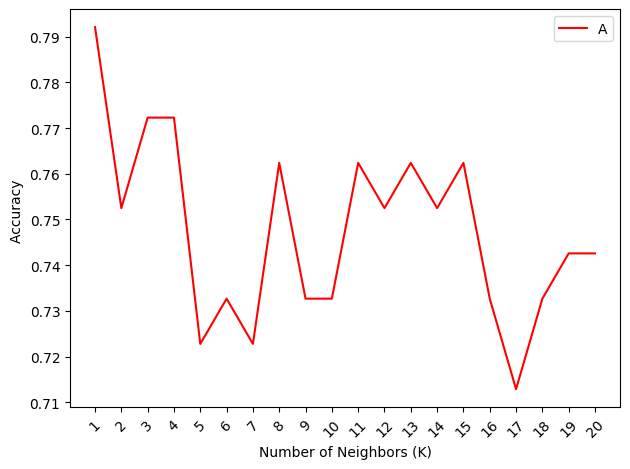

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1, nK+1), mean_acc, 'r')
plt.xticks(range(1, nK+1), fontsize=10, rotation=45)
plt.legend(('Accuracy '))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [ ]:
# @title Visualization
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder

# For demonstrational purposes, we are going take two features
def plot_knn_two_feature_regions(X, y, n_neighbors=3, resolution=0.02):
  # setup marker generator and color map
  colors = ('orange', 'cornflowerblue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  # Plot the decision boundary. For that, we will assign a color to each
  # point in the mesh [x_min, x_max]x[y_min, y_max].
  X = X.loc[:, ['culmen_length_mm', 'culmen_depth_mm']]
  le = LabelEncoder()
  y = le.fit_transform(y) # plot does not accept string labels. We need to transform them into numbers
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=4)

  x1_min, x1_max = X_test.iloc[:, 0].min() - 1, X_test.iloc[:, 0].max() + 1
  x2_min, x2_max = X_test.iloc[:, 1].min() - 1, X_test.iloc[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))

  # kNN prediction
  knn = KNeighborsClassifier(n_neighbors)
  knn.fit(X_train, y_train)
  Z = knn.predict(np.array([xx1.ravel(), xx2.ravel()]).T)

  # Put the result into a color plot
  Z = Z.reshape(xx1.shape)
  plt.figure()
  plt.pcolormesh(xx1, xx2, Z, cmap=cmap, shading='nearest')
  plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)

  # Plot the training points
  plt.scatter(X_test.iloc[:, 0],
            X_test.iloc[:, 1],
            c=y_test,
            cmap=cmap,
            edgecolor='k',
            s=20)

  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())
  plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


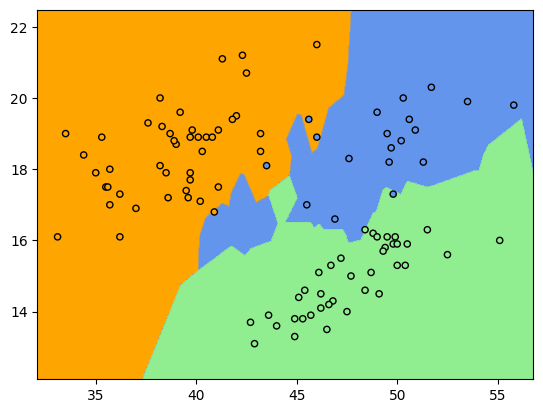

In [ ]:
plot_knn_two_feature_regions(X, y, n_neighbors=1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


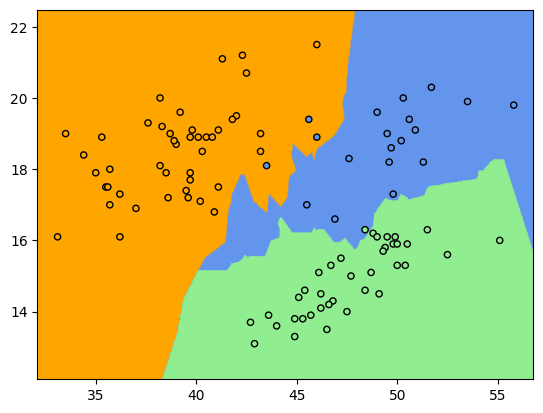

In [ ]:
plot_knn_two_feature_regions(X, y, n_neighbors=2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


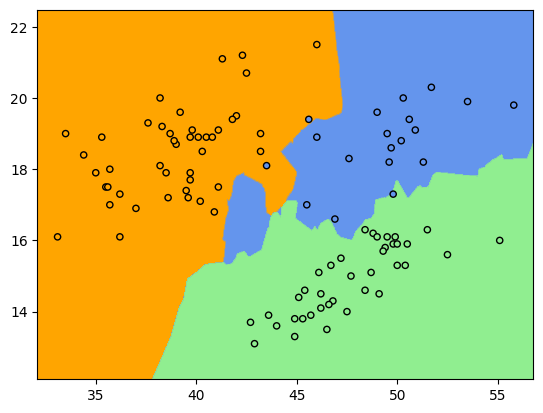

In [ ]:
plot_knn_two_feature_regions(X, y, n_neighbors=3)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


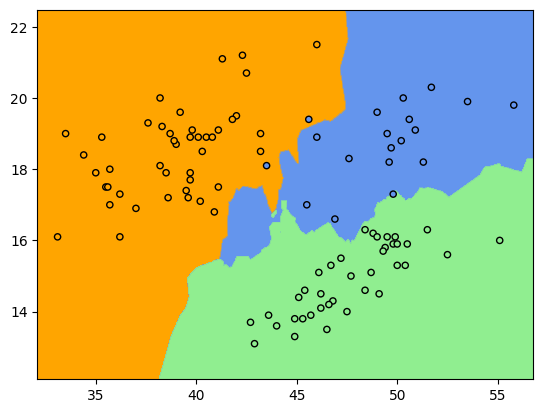

In [ ]:
plot_knn_two_feature_regions(X, y, n_neighbors=4)

# HW

ทำการใช้ kNN algorithm มา predict ข้อมูลใน Apple Quality Dataset ใน column ส่วนข้อมูล Quality (binary classification) แล้วหาผลลัพธ์ ดังนี้
  
1. ให้สร้าง train set และ test set จาก dataset ที่กำหนด โดยให้ test_size=0.3 และ random_state=4
2. ให้หาค่า k ที่ดีที่สุดในช่วง 1 ถึง 30
3. ให้หาค่า accuracy ที่สูงที่สุด ในช่วง k ที่กำหนด

In [ ]:
! kaggle datasets download nelgiriyewithana/apple-quality
! unzip apple-quality.zip

Dataset URL: https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality
License(s): other
100% 170k/170k [00:00<00:00, 501kB/s]
100% 170k/170k [00:00<00:00, 501kB/s]
Archive:  apple-quality.zip
  inflating: apple_quality.csv       


In [ ]:
apple = pd.read_csv('apple_quality.csv').dropna()
apple

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3995,3995.0,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369,bad
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good


In [ ]:
# Drop column A_id (Apple ID)
apple.drop(columns='A_id', inplace=True)
apple['Quality'].unique()

array(['good', 'bad'], dtype=object)